<a href="https://colab.research.google.com/github/LuccaMello7/Portfolio/blob/main/SUS_RS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analisando Dados da Saúde com Python e Pandas
Olá! Seja bem-vindo ao meu Notebook referente ao primeiro curso do Bootcamp de Ciência de Dados Aplicada da Alura.

1) Aquisição e Leitura de Dados Reais
Para essa primeira visualização, iremos realizar o arquivo .csv "*ValorTotalGasto-2008-2021-Processamento.csv*" que corresponde aos valores "Ano/Mês Processamento" obtidos no link abaixo :

https://datasus.saude.gov.br/acesso-a-informacao/producao-hospitalar-sih-sus

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
from matplotlib.colors import ListedColormap
import seaborn as sns
import fileinput
import re
import sys



#Importando os dados

Os dados foram retirados do Datasus e os mesmos foram importados para o meu Github, onde você pode acessá-los [aqui](https://github.com/LuccaMello7/BootcampDataScience_Alura/tree/main/M%C3%B3dulo%201). 

No trecho de código abaixo, realizamos a importação dos mesmos dados usando os comandos *pd.read_csv*. Podemos também ver que alguns parâmetros foram usandos como os comandos: *skiprows* e *skipfooter*, para remover as linhas que não foram usadas.

#Limpeza e Transformação do Índice

Para melhor organização e visualização, iremos realizar a remoção dos números e do espaço antes de cada valor da coluna Município e a transformaremos no índice nessa tabela de dados para facilitar a busca da linha de cada município.

In [ ]:
link_gastos = "https://raw.githubusercontent.com/LuccaMello7/BootcampDataScience_Alura/main/M%C3%B3dulo%201/gastos.csv"
link_internacoes = "https://raw.githubusercontent.com/LuccaMello7/BootcampDataScience_Alura/main/M%C3%B3dulo%201/internacoes.csv"
link_obitos = "https://raw.githubusercontent.com/LuccaMello7/BootcampDataScience_Alura/main/M%C3%B3dulo%201/obitos.csv"
link_populacao = 'https://raw.githubusercontent.com/LuccaMello7/BootcampDataScience_Alura/main/M%C3%B3dulo%201/populacao.csv'

dados_gastos = pd.read_csv(link_gastos, encoding="ISO-8859-1", sep = ";",   skiprows=3, skipfooter= 12, engine = "python", thousands = ".", decimal = ",")
dados_internacoes = pd.read_csv(link_internacoes, encoding="ISO-8859-1", sep = ";",   skiprows=3, skipfooter= 12, engine = "python", thousands = ".", decimal = ",")
dados_obitos = pd.read_csv(link_obitos, encoding="ISO-8859-1", sep = ";",   skiprows=3, skipfooter= 13, engine = "python", thousands = ".", decimal = ",")
dados_populacao = pd.read_csv(link_populacao, encoding="ISO-8859-1", sep = ";",  skiprows=3, skipfooter= 12, engine = "python", thousands = ".", decimal = ",")

dados_gastos.head()

,Município,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,Total
0,430003 Aceguá,21427.56,18618.02,25311.43,22561.91,22279.18,26251.53,26185.84,20266.58,20322.59,24175.98,25332.02,17798.89,29661.60,33022.05,30765.31,31900.43,29666.82,28390.56,27420.45,29480.31,26143.81,33796.17,31601.02,20602.56,20451.20,27048.54,27676.99,29027.47,28275.80,27314.34,29063.27,29256.98,24405.47,32856.45,21380.49,26174.07,20150.66,33291.06,27770.16,...,19211.20,25973.24,28898.28,27681.23,27187.53,29324.05,25989.78,24112.83,24943.95,23015.49,29784.30,16702.93,13995.79,17450.16,18389.78,31322.33,28371.37,34611.44,23388.25,28828.35,18936.51,16983.02,19493.65,16595.04,17747.37,15207.94,12361.56,15864.11,12893.00,12800.37,11772.93,12232.27,18942.16,10672.01,18192.63,14402.29,15681.71,14297.54,52311.82,5005073.77
1,430010 Agudo,43645.99,46808.02,46007.12,35220.52,45605.87,33901.95,33299.78,43743.62,37428.64,40998.57,38652.80,42159.39,30153.73,39887.40,36916.83,46476.00,39753.20,37195.81,43248.45,48484.18,37380.23,42267.48,35455.41,31781.33,43788.69,44368.82,41408.54,41746.28,29818.97,35408.39,43357.30,47625.40,42906.15,42024.39,44113.08,40591.95,41498.70,33045.76,39258.96,...,39222.54,55167.27,44243.24,62232.72,51063.02,82744.01,36516.58,56618.15,53694.19,48367.03,40699.24,29699.89,39882.78,38234.23,44830.25,47450.49,41776.04,45793.92,52320.69,51934.29,57194.28,57026.55,48687.47,41229.63,39141.68,42095.38,38350.99,37205.80,47163.65,49823.22,34421.39,47501.72,59758.85,39752.46,43983.87,57314.27,71419.32,78856.33,79636.61,7496433.90
2,430020 Ajuricaba,14574.05,15448.57,13243.31,13347.17,14520.46,19626.83,14583.08,13295.02,11686.82,16225.09,15269.17,15022.91,15454.53,15856.88,15386.79,10463.51,12898.42,12863.02,11625.98,14465.79,17084.95,13889.61,12284.30,16277.16,18574.93,11645.19,12822.91,14282.43,14584.38,11440.37,14532.40,15483.72,13191.16,12106.28,12809.49,15014.29,14642.51,12800.21,13863.49,...,-,18666.68,10619.32,9128.17,7191.35,5372.37,11372.23,16825.81,11100.94,5304.73,4074.81,5855.13,2667.02,2096.95,4590.55,5953.49,8231.68,7198.41,9418.66,11740.53,9094.63,7928.55,8778.48,5623.25,7044.84,8334.67,1100.66,4969.73,4469.64,4576.84,4246.67,11706.06,12296.16,3972.47,19607.40,19526.74,5567.81,19382.28,30577.53,1781079.65
3,430030 Alecrim,18644.27,10850.05,13253.58,15109.15,11308.77,9484.74,13864.38,14251.48,12485.20,8403.24,12321.15,14519.65,9569.93,11526.97,13985.85,10276.23,1483.38,28292.39,17845.77,25732.24,17106.79,21588.30,11951.89,12845.73,13819.30,12247.78,10150.90,11632.64,10576.33,12910.67,12258.62,16012.75,16127.52,15626.39,18521.88,13940.24,12549.92,14031.73,19469.00,...,17532.70,16941.52,16086.81,16817.89,17702.94,20432.93,18442.20,17956.19,20130.45,19172.10,20799.65,19669.51,19350.85,20936.20,21558.18,27554.00,24669.39,19797.95,23624.46,19998.07,22404.94,20559.76,20795.46,20940.36,22548.06,19707.56,19957.87,21527.84,20046.12,18988.29,26887.44,24171.64,28880.58,30913.88,46895.05,36166.80,29322.16,54142.32,34175.30,3042324.72
4,430040 Alegrete,294397.38,230721.57,267099.02,255336.12,287112.57,260378.18,314236.06,274918.99,259507.17,318419.70,336072.98,333399.65,303468.92,270395.50,309519.47,341757.71,307088.68,303712.09,379966.08,493482.73,462101.55,490129.38,489188.04,461159.71,518834.82,371699.45,507110.12,476122.04,423362.06,521759.44,479398.09,451396.94,463777.80,511143.01,539931.16,443375.45,4

#Dados Valor Total Gastos no SUS

Conforme verificado com os comandos abaixo, possuímos *281 linhas* e *161 colunas* em nossa tabela de dados gastos no SUS do Rio Grande do Sul.

Possuímos 1 coluna para o Município do Estado do Rio Grande do Sul e 160 colunas para representar o ano (**2008-2019**) e mês (**Jan-Dez**) do dados coletados.

In [ ]:
dados_gastos['Município'] = dados_gastos['Município'].str.replace('\d+', '')
dados_gastos['Município'] = dados_gastos['Município'].str.lstrip()
dados_gastos.set_index('Município', inplace = True)

O trecho de código acima, removemos os números que se encontravem dentro da mesma célula com o nome do Município, fazendo que os nossos dados fiquem ainda mais claros para serem lidos e trabalhados posteriormente.

In [ ]:
dados_gastos.drop(['2020/Jan', '2020/Fev',
                   '2020/Mar', '2020/Abr',
                   '2020/Mai', '2020/Jun',
                   '2020/Jul', '2020/Ago',
                   '2020/Set', '2020/Out',
                   '2020/Nov', '2020/Dez',
                   '2021/Jan', '2021/Fev', '2021/Mar', '2021/Abr'], axis = 1, inplace=True)

In [ ]:
for data in dados_gastos.drop('Total', axis = 1).columns :
  dados_gastos[data] = dados_gastos[data].str.replace("-", "0")
  dados_gastos[data] = dados_gastos[data].astype('float64')

Por outro lado, conforme previamente comentado, removemos as colunas referentes ao ano de 2021. Para que tenhamos um visão global anual dos dados. Assim como o trecho abaixo onde após as remoções das colunas referentes ao ano de 2021, realizamos a soma para obtermos o total dos valores.

In [ ]:
dados_gastos['Total'] = [round(dados_gastos.loc[x].drop('Total').sum(),2) for x in dados_gastos.index]

In [ ]:
print(f'A tabela de gastos no SUS do Rio Grande do Sul possui {dados_gastos.shape[0]} linhas e {dados_gastos.shape[1]} colunas.')

# Para fins de melhor exemplificação da tabela iremos retornar apenas as 5 primeiras linhas.
dados_gastos.head()

A tabela de gastos no SUS do Rio Grande do Sul possui 275 linhas e 145 colunas.


,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,...,2016/Out,2016/Nov,2016/Dez,2017/Jan,2017/Fev,2017/Mar,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,Total
Município,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aceguá,21427.56,18618.02,25311.43,22561.91,22279.18,26251.53,26185.84,20266.58,20322.59,24175.98,25332.02,17798.89,29661.60,33022.05,30765.31,31900.43,29666.82,28390.56,27420.45,29480.31,26143.81,33796.17,31601.02,20602.56,20451.20,27048.54,27676.99,29027.47,28275.80,27314.34,29063.27,29256.98,24405.47,32856.45,21380.49,26174.07,20150.66,33291.06,27770.16,25042.24,...,26510.97,22269.50,23894.81,22920.46,21516.65,20504.99,22182.56,26745.95,27198.63,27636.97,25408.41,18388.02,18296.11,30796.11,25304.83,23390.96,19211.20,25973.24,28898.28,27681.23,27187.53,29324.05,25989.78,24112.83,24943.95,23015.49,29784.30,16702.93,13995.79,17450.16,18389.78,31322.33,28371.37,34611.44,23388.25,28828.35,18936.51,16983.02,19493.65,4733099.02
Agudo,43645.99,46808.02,46007.12,35220.52,45605.87,33901.95,33299.78,43743.62,37428.64,40998.57,38652.80,42159.39,30153.73,39887.40,36916.83,46476.00,39753.20,37195.81,43248.45,48484.18,37380.23,42267.48,35455.41,31781.33,43788.69,44368.82,41408.54,41746.28,29818.97,35408.39,43357.30,47625.40,42906.15,42024.39,44113.08,40591.95,41498.70,33045.76,39258.96,40922.52,...,70980.13,63295.18,78781.18,28188.28,30391.55,49538.87,32019.28,21288.66,47448.20,70701.24,46844.51,63554.76,63103.33,38719.39,65122.53,47425.89,39222.54,55167.27,44243.24,62232.72,51063.02,82744.01,36516.58,56618.15,53694.19,48367.03,40699.24,29699.89,39882.78,38234.23,44830.25,47450.49,41776.04,45793.92,52320.69,51934.29,57194.28,57026.55,48687.47,6688778.73
Ajuricaba,14574.05,15448.57,13243.31,13347.17,14520.46,19626.83,14583.08,13295.02,11686.82,16225.09,15269.17,15022.91,15454.53,15856.88,15386.79,10463.51,12898.42,12863.02,11625.98,14465.79,17084.95,13889.61,12284.30,16277.16,18574.93,11645.19,12822.91,14282.43,14584.38,11440.37,14532.40,15483.72,13191.16,12106.28,12809.49,15014.29,14642.51,12800.21,13863.49,15032.23,...,8145.88,9452.69,12200.11,8174.06,11759.56,10206.25,10663.69,11183.75,13418.51,6295.83,11785.71,11873.30,9904.95,8210.71,7432.67,6041.49,0.00,18666.68,10619.32,9128.17,7191.35,5372.37,11372.23,16825.81,11100.94,5304.73,4074.81,5855.13,2667.02,2096.95,4590.55,5953.49,8231.68,7198.41,9418.66,11740.53,9094.63,7928.55,8778.48,1618076.90
Alecrim,18644.27,10850.05,13253.58,15109.15,11308.77,9484.74,13864.38,14251.48,12485.20,8403.24,12321.15,14519.65,9569.93,11526.97,13985.85,10276.23,1483.38,28292.39,17845.77,25732.24,17106.79,21588.30,11951.89,12845.73,13819.30,12247.78,10150.90,11632.64,10576.33,12910.67,12258.62,16012.75,16127.52,15626.39,18521.88,13940.24,12549.92,14031.73,19469.00,17797.92,...,17580.97,17743.52,20917.41,18992.10,20371.39,16869.47,19453.36,20075.73,22328.45,21798.69,20701.92,21843.71,20165.86,17895.89,19060.23,17859.56,17532.70,16941.52,16086.81,16817.89,17702.94,20432.93,18442.20,17956.19,20130.45,19172.10,20799.65,19669.51,19350.85,20936.20,21558.18,27554.00,24669.39,19797.95,23624.46,19998.07,22404.94,20559.76,20795.46,2587053.45
Alegrete,294397.38,230721.57,267099.02,255336.12,287112.57,260378.18,314236.06,274918.99,259507.17,318419.70,336072.98,333399.65,303468.92,270395.50,309519.47,341757.71,307088.68,303712.09,379966.08,493482.73,462101.55,490129.38,489188.04,461159.71,518834.82,371699.45,507110.12,47612

#Dados de Óbitos

In [ ]:
dados_obitos['Município'] = dados_obitos['Município'].str.replace('\d+', '')
dados_obitos['Município'] = dados_obitos['Município'].str.lstrip()
dados_obitos.set_index('Município', inplace = True)

In [ ]:
print(f'A Tabela de Óbitos no SUS do Rio Grande do Sul possui {dados_obitos.shape[0]} linhas e {dados_obitos.shape[1]} colunas.')
dados_obitos.head()

A Tabela de Óbitos no SUS do Rio Grande do Sul possui 272 linhas e 161 colunas.


,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,...,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,Total
Município,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aceguá,-,1,-,-,1,1,1,3,1,1,-,-,-,1,1,-,1,1,3,2,2,1,-,1,-,-,-,2,2,-,2,-,-,3,2,1,1,-,1,2,...,-,-,2,-,2,-,-,-,2,2,-,-,-,2,-,1,-,1,3,1,1,1,-,1,1,2,2,2,-,2,2,-,2,1,-,-,-,3,1,152
Agudo,4,6,3,1,3,6,3,2,3,2,2,3,2,2,2,6,4,1,3,3,-,1,-,2,2,5,3,8,3,1,3,-,5,4,1,2,1,-,1,-,...,5,4,1,5,3,6,2,4,6,3,5,3,2,2,3,6,3,6,5,5,9,8,2,7,1,2,3,1,4,4,8,1,5,4,4,5,5,9,4,589
Ajuricaba,2,2,-,2,1,2,-,1,1,2,-,3,2,-,-,1,-,1,-,2,-,2,1,3,-,-,-,-,2,2,-,3,1,2,-,1,-,-,2,1,...,-,3,-,2,1,2,1,2,-,-,-,1,-,-,-,1,1,1,1,1,1,1,1,1,-,2,-,-,-,1,2,4,1,2,2,4,1,3,4,170
Alecrim,-,2,1,-,-,-,-,-,-,-,-,-,1,-,-,-,-,-,1,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,2,-,...,-,2,2,2,4,2,4,3,1,3,1,2,4,4,5,4,4,1,1,4,3,5,4,4,4,3,2,5,2,-,4,8,7,6,6,6,-,5,5,245
Alegrete,32,18,27,22,24,24,22,28,24,26,19,19,33,15,18,22,23,31,40,32,24,27,26,23,22,26,31,17,27,32,29,27,30,34,39,31,29,33,22,31,...,33,26,29,32,29,38,30,45,33,20,27,39,32,20,23,31,30,35,43,27,32,28,26,32,29,24,16,20,34,35,24,29,22,30,34,31,43,89,79,4930


In [ ]:
for data in dados_obitos.drop('Total', axis = 1).columns:
  dados_obitos[data] = dados_obitos[data].str.replace("-", "0")
dados_obitos.drop(['2021/Jan', '2021/Fev', '2021/Mar', '2021/Abr'], axis = 1, inplace=True)
  

In [ ]:
dados_gastos

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,...,2016/Out,2016/Nov,2016/Dez,2017/Jan,2017/Fev,2017/Mar,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,Total
Município,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aceguá,21427.56,18618.02,25311.43,22561.91,22279.18,26251.53,26185.84,20266.58,20322.59,24175.98,25332.02,17798.89,29661.60,33022.05,30765.31,31900.43,29666.82,28390.56,27420.45,29480.31,26143.81,33796.17,31601.02,20602.56,20451.20,27048.54,27676.99,29027.47,28275.80,27314.34,29063.27,29256.98,24405.47,32856.45,21380.49,26174.07,20150.66,33291.06,27770.16,25042.24,...,26510.97,22269.50,23894.81,22920.46,21516.65,20504.99,22182.56,26745.95,27198.63,27636.97,25408.41,18388.02,18296.11,30796.11,25304.83,23390.96,19211.20,25973.24,28898.28,27681.23,27187.53,29324.05,25989.78,24112.83,24943.95,23015.49,29784.30,16702.93,13995.79,17450.16,18389.78,31322.33,28371.37,3.461144e+04,2.338825e+04,28828.35,1.893651e+04,16983.02,19493.65,4.733099e+06
Agudo,43645.99,46808.02,46007.12,35220.52,45605.87,33901.95,33299.78,43743.62,37428.64,40998.57,38652.80,42159.39,30153.73,39887.40,36916.83,46476.00,39753.20,37195.81,43248.45,48484.18,37380.23,42267.48,35455.41,31781.33,43788.69,44368.82,41408.54,41746.28,29818.97,35408.39,43357.30,47625.40,42906.15,42024.39,44113.08,40591.95,41498.70,33045.76,39258.96,40922.52,...,70980.13,63295.18,78781.18,28188.28,30391.55,49538.87,32019.28,21288.66,47448.20,70701.24,46844.51,63554.76,63103.33,38719.39,65122.53,47425.89,39222.54,55167.27,44243.24,62232.72,51063.02,82744.01,36516.58,56618.15,53694.19,48367.03,40699.24,29699.89,39882.78,38234.23,44830.25,47450.49,41776.04,4.579392e+04,5.232069e+04,51934.29,5.719428e+04,57026.55,48687.47,6.688779e+06
Ajuricaba,14574.05,15448.57,13243.31,13347.17,14520.46,19626.83,14583.08,13295.02,11686.82,16225.09,15269.17,15022.91,15454.53,15856.88,15386.79,10463.51,12898.42,12863.02,11625.98,14465.79,17084.95,13889.61,12284.30,16277.16,18574.93,11645.19,12822.91,14282.43,14584.38,11440.37,14532.40,15483.72,13191.16,12106.28,12809.49,15014.29,14642.51,12800.21,13863.49,15032.23,...,8145.88,9452.69,12200.11,8174.06,11759.56,10206.25,10663.69,11183.75,13418.51,6295.83,11785.71,11873.30,9904.95,8210.71,7432.67,6041.49,0.00,18666.68,10619.32,9128.17,7191.35,5372.37,11372.23,16825.81,11100.94,5304.73,4074.81,5855.13,2667.02,2096.95,4590.55,5953.49,8231.68,7.198410e+03,9.418660e+03,11740.53,9.094630e+03,7928.55,8778.48,1.618077e+06
Alecrim,18644.27,10850.05,13253.58,15109.15,11308.77,9484.74,13864.38,14251.48,12485.20,8403.24,12321.15,14519.65,9569.93,11526.97,13985.85,10276.23,1483.38,28292.39,17845.77,25732.24,17106.79,21588.30,11951.89,12845.73,13819.30,12247.78,10150.90,11632.64,10576.33,12910.67,12258.62,16012.75,16127.52,15626.39,18521.88,13940.24,12549.92,14031.73,19469.00,17797.92,...,17580.97,17743.52,20917.41,18992.10,20371.39,16869.47,19453.36,20075.73,22328.45,21798.69,20701.92,21843.71,20165.86,17895.89,19060.23,17859.56,17532.70,16941.52,16086.81,16817.89,17702.94,20432.93,18442.20,17956.19,20130.45,19172.10,20799.65,19669.51,19350.85,20936.20,21558.18,27554.00,24669.39,1.979795e+04,2.362446e+04,19998.07,2.240494e+04,20559.76,20795.46,2.587053e+06
Alegrete,294397.38,230721.57,267099.02,255336.12,287112.57,260378.18,314236.06,274918.99,259507.17,318419.70,336072.98,333399.65,303468.92,270395.50,309519.47,341757.71,307088.68,303712.09,379966.08,493482.73,462101.55,490129

In [ ]:

dados_gastos_ano = []
for x in dados_populacao.columns :
  x = [dados_gastos.loc[loc][dados_gastos.columns[dados_gastos.columns.str.contains(x)]].sum() for loc in dados_gastos.index]
  dados_gastos_ano.append(x)
  
dados_gastos_ano = pd.DataFrame(dados_gastos_ano).T
dados_gastos_ano.columns = dados_populacao.columns
dados_gastos_ano.index = dados_gastos.index

dados_gastos_ano['Total'] = [dados_gastos_ano.loc[loc].sum() for loc in dados_gastos_ano.index]

dados_gastos_ano

,Município,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total
Município,,,,,,,,,,,,,,,,,,,,,,
Aceguá,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.705315e+05,3.524511e+05,3.229311e+05,3.257235e+05,3.651452e+05,6.540579e+05,7.026628e+05,5.588126e+05,3.158971e+05,2.868997e+05,3.095128e+05,2.684736e+05,4.733099e+06
Agudo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.874723e+05,4.690000e+05,4.971580e+05,4.495349e+05,4.430270e+05,5.515807e+05,6.303284e+05,6.834992e+05,7.474328e+05,5.569206e+05,6.179939e+05,5.548309e+05,6.688779e+06
Ajuricaba,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.768425e+05,1.685509e+05,1.664876e+05,1.562834e+05,1.349979e+05,1.347226e+05,1.283933e+05,1.146617e+05,1.269761e+05,1.209090e+05,1.056979e+05,8.355408e+04,1.618077e+06
Alecrim,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.544957e+05,1.822055e+05,1.638250e+05,2.147935e+05,2.073804e+05,2.497954e+05,2.286464e+05,2.358818e+05,2.296794e+05,2.395568e+05,2.198749e+05,2.609188e+05,2.587053e+06
Alegrete,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.431599e+06,4.611970e+06,5.707910e+06,5.631855e+06,5.746326e+06,5.978105e+06,6.275053e+06,6.032864e+06,4.836405e+06,5.883014e+06,6.123213e+06,6.096437e+06,6.635475e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vicente Dutra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.494521e+04,6.834916e+04,6.478731e+04,4.106447e+04,0.000000e+00,4.555620e+04,2.598753e+04,3.976291e+04,2.908120e+04,1.850048e+04,8.940910e+03,0.000000e+00,4.269754e+05
Victor Graeff,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.054478e+04,4.212337e+04,1.859236e+04,1.527779e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.653830e+04
Vila Maria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.469013e+04,7.694910e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.238504e+04


In [ ]:
dados_obitos_mes = []
mes = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']

for x in mes : 
  x = [dados_obitos.loc[loc][dados_obitos.columns[dados_obitos.columns.str.contains(x)]].sum() for loc in dados_obitos.index]
  dados_obitos_mes.append(x) 

dados_obitos_mes = pd.DataFrame(dados_obitos_mes).T
dados_obitos_mes.columns = mes
dados_obitos_mes.index = dados_obitos.index
dados_obitos_mes

,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez
Município,,,,,,,,,,,,
Aceguá,0001330015101,1100311002001,0101010011022,0022003100202,1120200000012,1100200101200,1320071210012,3203210023032,1200110021010,1132000210212,0020100221211,0110111210000
Agudo,42211223621237,6250860411521,3231403248422,1680113462133,3432164521561,6112441176334,3332154712664,2301356689258,30531233133451,2142067063695,20132431253384,3227978365524
Ajuricaba,2200020101111,2000133003000,0002021001302,2101110011000,1020210010210,2122110012110,0000102010211,1231241331112,1012102000214,2221231301011,0101112101012,3310301100012
Alecrim,0100000103124,2000001010044,1002211112243,0000010201252,0000010300245,0001025232442,0102002331210,0002233132414,0000022321348,0001000001137,0000046321356,0001120261146
Alegrete,32332229252436393349333932,18152633352126252925333229,27183122182826342633262024,22221731282624312724292316,24232735253534323431323120,24313238283137413138293034,22402934334527462241383535,28322739313541302139304324,24243035284530313740452729,26273435343042332942333222,19263925232830273337202830,19233127243230363040272634
...,...,...,...,...,...,...,...,...,...,...,...,...
Viamão,17122533163232613540263468,28372921263139383432104755,17292728203240445441273749,26231920223440374840453240,22333129402937454247764070,38333124413541485354414569,28472519414335616249585275,30463119304446484746515590,32212651322935535746614156,19303223334737485953454575,21291927223346655948413668,39273226293534494251233783
Vicente Dutra,0010010102100,0003000000300,0000000100000,1000000100000,0000000020100,0010000000000,0001000000000,0000001100000,0000000000000,0000000000000,0200000000000,0010000000000
Victor Graeff,0100000000000,0101000000000,0100000000000,0111000000000,0200000000000,0000000000000,0110000000000,0000000000000,0000000000000,1000000000000,1000000000000,0100000000000


In [ ]:
dados_internacoes['Município'] = dados_internacoes['Município'].str.replace('\d+', '')
dados_internacoes['Município'] = dados_internacoes['Município'].str.lstrip()
dados_internacoes.set_index('Município', inplace = True)

In [ ]:

for data in dados_internacoes.drop('Total', axis = 1).columns :
  dados_internacoes[data] = dados_internacoes[data].str.replace("-", "0")
  dados_internacoes[data] = dados_internacoes[data].astype('int')

In [ ]:
dados_internacoes.drop(['2020/Jan', '2020/Fev',
                   '2020/Mar', '2020/Abr',
                   '2020/Mai', '2020/Jun',
                   '2020/Jul', '2020/Ago',
                   '2020/Set', '2020/Out',
                   '2020/Nov', '2020/Dez',
                   '2021/Jan', '2021/Fev', '2021/Mar', '2021/Abr'], axis = 1, inplace=True)

dados_internacoes['Total'] = [round(dados_internacoes.loc[x].drop('Total').sum(),2) for x in dados_internacoes.index]

In [ ]:
dados_internacoes

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,...,2016/Out,2016/Nov,2016/Dez,2017/Jan,2017/Fev,2017/Mar,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,Total
Município,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aceguá,61,49,72,52,59,64,66,47,55,56,68,48,74,79,63,71,70,59,59,60,57,66,66,44,44,64,61,60,58,56,57,56,53,72,47,56,40,72,57,54,...,62,56,60,58,49,50,60,51,60,60,60,43,46,59,63,59,55,58,55,61,60,60,58,54,51,51,58,46,32,49,51,63,61,59,50,65,46,38,52,9435
Agudo,113,144,132,111,133,92,94,119,94,118,118,110,81,99,89,114,115,89,90,111,98,104,94,86,112,97,111,101,72,86,103,113,114,105,112,109,115,97,109,111,...,138,136,189,67,86,114,75,45,103,138,96,127,125,77,131,102,76,97,92,129,101,154,71,106,102,86,70,61,70,75,82,87,74,90,98,94,96,102,90,15412
Ajuricaba,45,45,37,43,43,53,40,33,30,31,31,32,33,40,34,23,26,24,23,30,33,28,28,32,42,26,32,29,30,27,29,32,30,28,35,34,36,26,27,34,...,14,24,28,20,27,25,26,26,27,13,22,23,22,17,15,15,0,42,23,23,16,13,22,30,21,9,8,10,9,5,10,13,19,11,19,19,19,19,18,3586
Alecrim,45,32,36,41,27,22,26,26,23,16,23,28,21,28,30,25,2,57,32,46,35,44,24,31,29,30,25,23,25,26,25,30,34,28,37,29,30,28,39,32,...,34,33,38,33,35,33,34,35,34,35,35,34,35,34,35,32,32,32,32,33,33,33,33,33,34,33,33,33,34,33,33,41,38,34,37,33,33,33,33,4692
Alegrete,534,443,434,437,426,404,532,443,448,524,539,523,418,419,423,437,427,414,490,452,477,486,476,476,504,390,502,444,465,467,493,427,471,432,487,474,437,461,514,506,...,399,324,440,421,313,428,400,427,426,463,465,461,482,457,453,459,482,449,382,443,488,448,481,411,503,431,450,514,431,395,395,424,472,426,484,468,505,495,480,65646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vicente Dutra,23,24,25,28,23,13,20,12,10,15,13,11,5,0,9,16,12,14,19,21,23,22,16,17,13,12,14,17,12,17,18,0,23,14,11,14,11,14,17,8,...,5,6,7,9,2,9,0,14,4,2,2,3,4,0,2,4,4,4,2,5,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1099
Victor Graeff,0,0,6,11,5,4,9,0,0,12,6,4,3,15,15,6,12,8,11,9,11,7,7,3,0,0,0,10,3,4,5,5,11,6,4,0,8,5,5,5,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,251
Vila Maria,13,17,14,3,19,5,8,10,5,15,12,8,4,14,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,148


In [ ]:
dados_internacoes['Total'] = [round(dados_internacoes.loc[x].drop('Total').sum(),2) for x in dados_internacoes.index]

In [ ]:
dados_internacoes

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,...,2016/Out,2016/Nov,2016/Dez,2017/Jan,2017/Fev,2017/Mar,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,Total
Município,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aceguá,61,49,72,52,59,64,66,47,55,56,68,48,74,79,63,71,70,59,59,60,57,66,66,44,44,64,61,60,58,56,57,56,53,72,47,56,40,72,57,54,...,62,56,60,58,49,50,60,51,60,60,60,43,46,59,63,59,55,58,55,61,60,60,58,54,51,51,58,46,32,49,51,63,61,59,50,65,46,38,52,9435
Agudo,113,144,132,111,133,92,94,119,94,118,118,110,81,99,89,114,115,89,90,111,98,104,94,86,112,97,111,101,72,86,103,113,114,105,112,109,115,97,109,111,...,138,136,189,67,86,114,75,45,103,138,96,127,125,77,131,102,76,97,92,129,101,154,71,106,102,86,70,61,70,75,82,87,74,90,98,94,96,102,90,15412
Ajuricaba,45,45,37,43,43,53,40,33,30,31,31,32,33,40,34,23,26,24,23,30,33,28,28,32,42,26,32,29,30,27,29,32,30,28,35,34,36,26,27,34,...,14,24,28,20,27,25,26,26,27,13,22,23,22,17,15,15,0,42,23,23,16,13,22,30,21,9,8,10,9,5,10,13,19,11,19,19,19,19,18,3586
Alecrim,45,32,36,41,27,22,26,26,23,16,23,28,21,28,30,25,2,57,32,46,35,44,24,31,29,30,25,23,25,26,25,30,34,28,37,29,30,28,39,32,...,34,33,38,33,35,33,34,35,34,35,35,34,35,34,35,32,32,32,32,33,33,33,33,33,34,33,33,33,34,33,33,41,38,34,37,33,33,33,33,4692
Alegrete,534,443,434,437,426,404,532,443,448,524,539,523,418,419,423,437,427,414,490,452,477,486,476,476,504,390,502,444,465,467,493,427,471,432,487,474,437,461,514,506,...,399,324,440,421,313,428,400,427,426,463,465,461,482,457,453,459,482,449,382,443,488,448,481,411,503,431,450,514,431,395,395,424,472,426,484,468,505,495,480,65646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vicente Dutra,23,24,25,28,23,13,20,12,10,15,13,11,5,0,9,16,12,14,19,21,23,22,16,17,13,12,14,17,12,17,18,0,23,14,11,14,11,14,17,8,...,5,6,7,9,2,9,0,14,4,2,2,3,4,0,2,4,4,4,2,5,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1099
Victor Graeff,0,0,6,11,5,4,9,0,0,12,6,4,3,15,15,6,12,8,11,9,11,7,7,3,0,0,0,10,3,4,5,5,11,6,4,0,8,5,5,5,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,251
Vila Maria,13,17,14,3,19,5,8,10,5,15,12,8,4,14,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,148


In [ ]:
dados_gastos_ano.drop(['Município', '2000', '2001', '2002', '2003', '2004', '2005', '2006','2007'], axis = 1, inplace=True)
dados_gastos_ano.head()

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total
Município,,,,,,,,,,,,,
Aceguá,270531.53,352451.09,322931.07,325723.50,365145.24,654057.91,702662.82,558812.60,315897.15,286899.69,309512.84,268473.58,4733099.02
Agudo,487472.27,469000.05,497157.96,449534.94,443027.04,551580.68,630328.44,683499.15,747432.84,556920.60,617993.88,554830.88,6688778.73
Ajuricaba,176842.48,168550.94,166487.55,156283.37,134997.88,134722.63,128393.30,114661.70,126976.08,120908.99,105697.90,83554.08,1618076.90
Alecrim,154495.66,182205.47,163825.02,214793.45,207380.37,249795.43,228646.36,235881.80,229679.38,239556.80,219874.94,260918.77,2587053.45
Alegrete,3431599.39,4611969.86,5707910.38,5631855.30,5746326.22,5978104.62,6275052.60,6032864.15,4836405.20,5883014.06,6123213.13,6096437.06,66354751.97


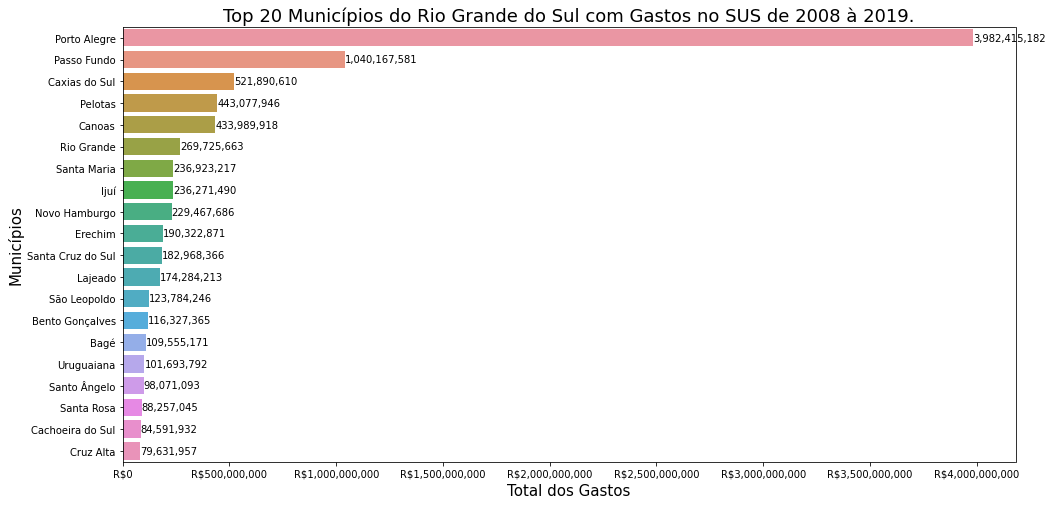

In [ ]:
dados_gastos_mes_20 = dados_gastos.drop('Total').sort_values(by = 'Total', ascending = False)[:20]

plt.figure(figsize = (16,8))
ax = sns.barplot(x = 'Total' , y = dados_gastos_mes_20.index, data = dados_gastos_mes_20)

ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('R${x:,.0f}'))

for p in ax.patches:
    width = p.get_width()    
    ax.text(width + 1,       
            p.get_y() + p.get_height() / 2,
            '{:,.0f}'.format(width), 
            ha = 'left',   
            va = 'center')

ax.set_title('Top 20 Municípios do Rio Grande do Sul com Gastos no SUS de 2008 à 2019.', fontsize = 18)
ax.set_xlabel('Total dos Gastos', fontsize = 15)
ax.set_ylabel('Municípios', fontsize = 15)

plt.show()

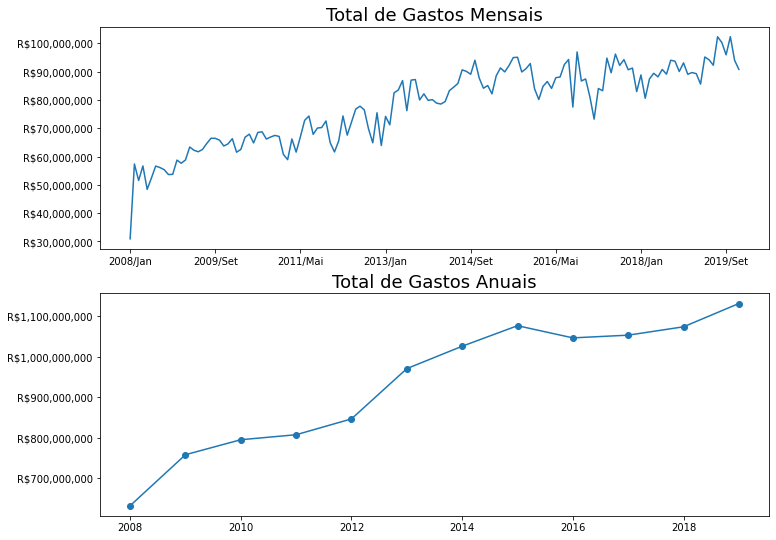

In [ ]:
fig, ax = plt.subplots(2, 1, figsize = (12,9))

dados_gastos.loc['Total'].drop('Total').plot(ax = ax[0])
dados_gastos_ano.loc['Total'].drop('Total').plot(ax = ax[1], marker = 'o')

ax[0].set_title('Total de Gastos Mensais', fontsize = 18)
ax[1].set_title('Total de Gastos Anuais', fontsize = 18)

ax[0].yaxis.set_major_formatter(ticker.StrMethodFormatter('R${x:,.0f}'))
ax[1].yaxis.set_major_formatter(ticker.StrMethodFormatter('R${x:,.0f}'))

plt.show()

ax[0].set_ylabel('Gastos Mensais', fontsize = 15)
ax[1].set_ylabel('Gastos Anuais', fontsize = 15)

ax[1].set_ylim(300000000, 800000000)

plt.show()

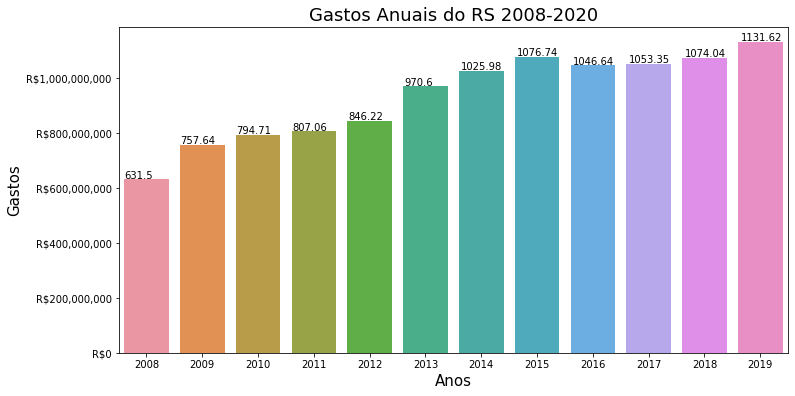

In [ ]:
plt.figure(figsize = (12,6))

ax = sns.barplot(x = dados_gastos_ano.loc['Total'].drop('Total').index, y = dados_gastos_ano.loc['Total'].drop('Total').values)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('R${x:,.0f}'))

for p in ax.patches:
    ax.annotate(str(round(p.get_height()/ 1000000, 2)), (p.get_x() * 1.005, p.get_height() * 1.005))

ax.set_title('Gastos Anuais do RS 2008-2020', fontsize = 18)
ax.set_xlabel('Anos', fontsize = 15)
ax.set_ylabel('Gastos', fontsize = 15)

plt.show()

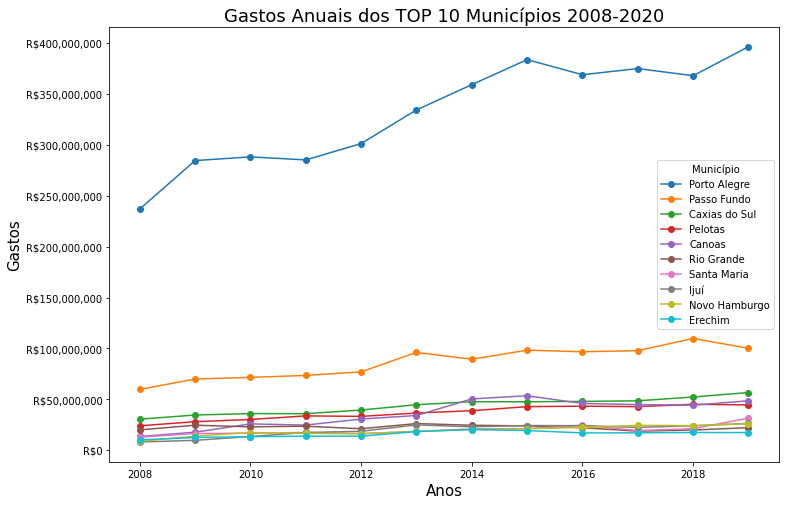

In [ ]:
dados_gastos_anos_10 = dados_gastos_ano.drop('Total').sort_values(by = 'Total', ascending = False).drop('Total', axis = 1)[:10]

fig, ax = plt.subplots(1, 1, figsize = (12,8))
dados_gastos_anos_10.T.plot(ax = ax, marker = 'o')

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('R${x:,.0f}'))

ax.set_title('Gastos Anuais dos TOP 10 Municípios 2008-2020', fontsize = 18)
ax.set_xlabel('Anos', fontsize = 15)
ax.set_ylabel('Gastos', fontsize = 15)

plt.show()

#Dados Populacionais


In [ ]:
dados_populacao['Município'] = dados_populacao['Município'].str.replace('\d+', '')
dados_populacao['Município'] = dados_populacao['Município'].str.lstrip()
dados_populacao.set_index('Município', inplace = True)

In [ ]:
dados_populacao.drop([x for x in dados_populacao.index if x not in dados_gastos.index], inplace = True)

In [ ]:
print(f' Os municípios {" e ".join([x for x in dados_gastos.index if x not in dados_obitos.index])} estão na tabela de gastos e não estão presentes na tabela de óbitos.') 
print(f' Possuímos {len([x for x in dados_obitos.index if x not in dados_gastos.index])} municípios diferentes da tabela de gastos.')

 Os municípios Campos Borges e Santana da Boa Vista e Total estão na tabela de gastos e não estão presentes na tabela de óbitos.
 Possuímos 0 municípios diferentes da tabela de gastos.


In [ ]:
for data in dados_populacao.columns :
  dados_populacao[data] = dados_populacao[data].str.replace("-", "0")
  dados_populacao[data] = dados_populacao[data].astype('int')

AttributeError: ignored

In [ ]:
dados_populacao

In [ ]:
for ano in dados_populacao.columns :
  dados_populacao[ano] = dados_populacao[ano].astype('int')
  dados_populacao.loc['Total', ano] = dados_populacao[ano].drop('Total').sum()

In [ ]:
dados_populacao.convert_dtypes()

In [ ]:
dados_populacao.info()

In [ ]:
dados_populacao_tamanho = dados_populacao.drop('Total').sort_values(by = '2019', ascending=False).iloc[:10, -1:]

fig, ax = plt.subplots(1, 1, figsize = (12,8))
sns.barplot(x = '2019' , y = dados_populacao_20.index, data = dados_populacao_tamanho)

for p in ax.patches:
    width = p.get_width()    
    ax.text(width + 1,       
            p.get_y() + p.get_height() / 2,
            '{:1,.0f}'.format(width), 
            ha = 'left',   
            va = 'center')

ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

ax.set_title("Os 10 Municípios mais populos do Rio Grande do Sul", fontsize = 20)
ax.set_xlabel("População", fontsize = 15)
ax.set_ylabel("Municípios", fontsize = 15)

plt.show()